## 1. Import Libraries and Set Up

We'll use numerical and symbolic computation to explore quantum gravity concepts.

In [2]:
# Import all necessary libraries with detailed explanations

import numpy as np                    # Numerical computing: arrays, linear algebra, math functions
import matplotlib.pyplot as plt       # Plotting library for visualizations
from scipy import constants           # Physical constants (c, hbar, G, etc.)
import sympy as sp                    # Symbolic math: algebra, calculus, equation solving
from sympy import symbols, diff, integrate, solve, sqrt, pi, exp, simplify

# Configure plotting for better visibility
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True

print("All libraries loaded successfully")
print(f"NumPy version: {np.__version__}")
print(f"SymPy version: {sp.__version__}")

All libraries loaded successfully
NumPy version: 1.24.4
SymPy version: 1.13.3


## 2. The Fundamental Incompatibility

### The Core Problem

Quantum mechanics and general relativity are built on fundamentally different assumptions about spacetime:

**Quantum Mechanics postulates:**
- Spacetime is a **fixed background** where quantum fields evolve
- The metric $g_{\mu\nu}(x)$ is given—not dynamical
- Particles and fields are quantized, spacetime is not
- Schrödinger equation: $i\hbar \frac{\partial \psi}{\partial t} = \hat{H} \psi$

**General Relativity postulates:**
- Spacetime is **dynamical**—it curves in response to matter/energy
- The metric $g_{\mu\nu}(x)$ is the fundamental field, satisfying Einstein's equations:
  $$G_{\mu\nu} + \Lambda g_{\mu\nu} = \frac{8\pi G}{c^4} T_{\mu\nu}$$
- Spacetime is a smooth classical manifold
- No background structure; the metric IS spacetime

### The Clash

Try to quantize gravity by treating it as a quantum field:
- The graviton (quantum of the metric) would be a spin-2 particle
- But this leads to **non-renormalizable divergences** in loop calculations
- Unlike QED (quantum electrodynamics), which is renormalizable, quantum gravity produces infinite, non-canceling infinities

**Mathematical fact:** General covariance (the principle underlying GR) is incompatible with a fixed background spacetime required by standard QFT.

## 3. Natural Units and the Planck Scale

### Why Do We Need Natural Units?

In SI units, Newton's constant $G$ has dimensions, making equations unwieldy. In natural units, we set:
$$c = \hbar = 1$$

This means:
- Energy, mass, and 1/length all have the same dimensions
- Time and length have inverse dimensions
- Everything is expressed in terms of one unit (usually energy or mass)

### The Planck Scale

The Planck scale is where quantum gravity effects become strong. Define:

**Planck mass:**
$$M_P = \sqrt{\frac{\hbar c}{G}}$$

**Planck length:**
$$\ell_P = \sqrt{\frac{\hbar G}{c^3}}$$

**Planck time:**
$$t_P = \sqrt{\frac{\hbar G}{c^5}}$$

**Planck energy:**
$$E_P = M_P c^2 = \sqrt{\frac{\hbar c^5}{G}}$$

### Why These Scales Matter

At the Planck scale:
- Quantum fluctuations in geometry become order-1
- Virtual black holes spontaneously appear and disappear
- The notion of smooth spacetime breaks down
- A proton has energy $\sim 10^9$ GeV; the Planck energy is $\sim 10^{19}$ GeV—17 orders of magnitude higher!

This explains why we haven't observed quantum gravity effects: the energy scale is unreachably high.

In [3]:
# Calculate and display Planck scale quantities
# Using SI units from scipy.constants

# Physical constants in SI units
hbar = constants.hbar              # Reduced Planck's constant: ℏ = h/(2π) ≈ 1.055 × 10⁻³⁴ J·s
c = constants.c                    # Speed of light: c ≈ 3 × 10⁸ m/s
G = constants.G                    # Gravitational constant: G ≈ 6.674 × 10⁻¹¹ m³/(kg·s²)
e = constants.e                    # Elementary charge (for comparison)
m_e = constants.m_e               # Electron mass
m_p = constants.m_p               # Proton mass

print("="*70)
print("FUNDAMENTAL PHYSICAL CONSTANTS (SI UNITS)")
print("="*70)
print(f"Reduced Planck constant ℏ = {hbar:.3e} J·s")
print(f"Speed of light c = {c:.3e} m/s")
print(f"Gravitational constant G = {G:.3e} m³/(kg·s²)")
print()

# Planck scale calculations
# PLANCK MASS: M_P = sqrt(ℏc/G)
# This has dimensions of mass because:
# [ℏc] = (J·s)(m/s) = J·m = kg·m²/s² · m = kg·m³/s²
# [G] = m³/(kg·s²)
# [ℏc/G] = (kg·m³/s²) / (m³/(kg·s²)) = kg² · s² / s² = kg²
# Therefore [sqrt(ℏc/G)] = kg ✓
M_planck = np.sqrt((hbar * c) / G)

# PLANCK LENGTH: ℓ_P = sqrt(ℏG/c³)
# Dimensions: [ℏG/c³] = (J·s)(m³/(kg·s²)) / (m³/s³)
# = (J·s·m³/(kg·s²)) · (s³/m³) = J·s² / kg·s² = (kg·m²/s²)·s²/kg·s² = m² ✓
l_planck = np.sqrt((hbar * G) / (c**3))

# PLANCK TIME: t_P = sqrt(ℏG/c⁵)
t_planck = np.sqrt((hbar * G) / (c**5))

# PLANCK ENERGY: E_P = M_P c²
E_planck = M_planck * (c**2)

# Convert to more familiar units
E_planck_GeV = E_planck / (constants.e * 1e9)  # Convert from Joules to GeV

print("="*70)
print("PLANCK SCALE QUANTITIES")
print("="*70)
print(f"Planck mass M_P = {M_planck:.3e} kg = {M_planck/m_p:.3e} × m_proton")
print(f"Planck length ℓ_P = {l_planck:.3e} m")
print(f"Planck time t_P = {t_planck:.3e} s")
print(f"Planck energy E_P = {E_planck:.3e} J = {E_planck_GeV:.3e} GeV")
print()

# Scale comparisons
print("="*70)
print("SCALE COMPARISONS")
print("="*70)

# Proton mass in GeV (for reference: 0.938 GeV)
m_proton_GeV = (m_p * c**2) / (constants.e * 1e9)
print(f"Proton mass: {m_proton_GeV:.3f} GeV")
print(f"Planck mass: {E_planck_GeV:.3e} GeV")
print(f"Ratio: E_P / m_proton = {E_planck_GeV / m_proton_GeV:.3e}")
print(f"  → Planck scale is {E_planck_GeV / m_proton_GeV:.0e} times higher than proton mass")
print()

# Distance scales
hydrogen_bohr = 0.5292e-10  # Bohr radius in meters
print(f"Bohr radius (atomic scale): {hydrogen_bohr:.3e} m")
print(f"Planck length: {l_planck:.3e} m")
print(f"Ratio: a_Bohr / ℓ_P = {hydrogen_bohr / l_planck:.3e}")
print(f"  → Atom is {hydrogen_bohr / l_planck:.0e} times larger than Planck length")
print()

# Time scales
t_universe = 13.8e9 * 365.25 * 24 * 3600  # Age of universe in seconds
print(f"Age of universe: {t_universe:.3e} s")
print(f"Planck time: {t_planck:.3e} s")
print(f"Ratio: t_universe / t_P = {t_universe / t_planck:.3e}")
print(f"  → Universe is {t_universe / t_planck:.0e} Planck times old")

FUNDAMENTAL PHYSICAL CONSTANTS (SI UNITS)
Reduced Planck constant ℏ = 1.055e-34 J·s
Speed of light c = 2.998e+08 m/s
Gravitational constant G = 6.674e-11 m³/(kg·s²)

PLANCK SCALE QUANTITIES
Planck mass M_P = 2.176e-08 kg = 1.301e+19 × m_proton
Planck length ℓ_P = 1.616e-35 m
Planck time t_P = 5.391e-44 s
Planck energy E_P = 1.956e+09 J = 1.221e+19 GeV

SCALE COMPARISONS
Proton mass: 0.938 GeV
Planck mass: 1.221e+19 GeV
Ratio: E_P / m_proton = 1.301e+19
  → Planck scale is 1e+19 times higher than proton mass

Bohr radius (atomic scale): 5.292e-11 m
Planck length: 1.616e-35 m
Ratio: a_Bohr / ℓ_P = 3.274e+24
  → Atom is 3e+24 times larger than Planck length

Age of universe: 4.355e+17 s
Planck time: 5.391e-44 s
Ratio: t_universe / t_P = 8.078e+60
  → Universe is 8e+60 Planck times old


## 4. Perturbative Quantum Gravity and Non-Renormalizability

### The Standard Approach: Treating Gravity as a Quantum Field

We can write the metric as:
$$g_{\mu\nu}(x) = \eta_{\mu\nu} + \kappa h_{\mu\nu}(x)$$

where:
- $\eta_{\mu\nu}$ is the flat Minkowski metric (background spacetime)
- $h_{\mu\nu}(x)$ is a small perturbation (the graviton field)
- $\kappa = \sqrt{32\pi G}$ is the gravitational coupling constant

In natural units ($\hbar = c = 1$): $\kappa^2 = 32\pi G = 32\pi / M_P^2$

### The Problem: Divergences

When computing quantum corrections (loop diagrams), we get integrals that diverge. For example, a simple one-loop amplitude behaves as:

$$A \sim \int d^4\ell \frac{1}{\ell^2} \sim \int d^4\ell \frac{1}{(\ell^2)^n}$$

where $\ell$ is the loop momentum.

These divergences can be classified:
- **Superficial divergence degree:** $D = 4 - 2n$ (where $n$ is number of propagators)

**Renormalizability criterion:** A theory is renormalizable if only finitely many coupling constants diverge.

For gravity:
- At tree level (no loops): works fine
- At 1-loop: divergences appear—can be absorbed into coupling constants
- At 2-loops: **new divergences appear that cannot be absorbed**
- This pattern continues: at each loop order, new non-renormalizable divergences arise

**Conclusion:** Perturbative quantum gravity is **non-renormalizable**—it is mathematically inconsistent as a quantum field theory.

## 5. String Theory: A Solution Through Higher Dimensions

### The Fundamental Premise

Instead of point particles, string theory proposes that fundamental objects are **one-dimensional strings** with:
- Characteristic length: $\ell_s$ (string length scale)
- Tension: $T = 1/(2\pi \ell_s^2)$ (energy per unit length)
- Mode expansion: infinite tower of vibrational states

### Why Strings Might Work

1. **Natural gravity:** Closed strings include a massless spin-2 state—automatically a graviton
2. **Renormalizability:** The extended structure of strings softens high-energy divergences
3. **Unification:** Both gauge forces and gravity emerge from the same formalism

### The Cost: Extra Dimensions

String theory requires:
- **Bosonic string:** 26 dimensions total (25 space + 1 time)
- **Superstring:** 10 dimensions total (9 space + 1 time)

To match our 4D universe, the extra $6$ or $22$ dimensions must be **compactified**—curled up at small scales.

This compactification geometry determines:
- Gauge groups (SU(3) × SU(2) × U(1) for the Standard Model)
- Particle masses and couplings
- The number of generations

### The String Landscape

There are an estimated $10^{500}$ to $10^{10^{500}}$ possible compactifications, each giving a different low-energy physics.

**Problem:** We can't determine which one is "ours." This is sometimes called the **string landscape crisis**.

### Advantages and Criticisms

**Advantages:**
- Mathematically elegant and self-consistent
- Naturally includes gravity
- Connects to deep mathematics (modular forms, algebraic geometry)

**Criticisms:**
- **Not falsifiable:** Makes few testable predictions at accessible energies
- **Requires extra dimensions:** Unobserved
- **Landscape problem:** Too many solutions
- **No experiments:** No evidence for strings at current energies

In [4]:
# Visualize string vibrational modes and compactification scales

# Define symbolic variables for analysis
n, alpha_prime, M_s = symbols('n alpha_prime M_s', positive=True, real=True)

print("="*70)
print("STRING THEORY FUNDAMENTALS")
print("="*70)
print()

# String mass spectrum in natural units
# M²_level = (n - a) / α', where α' = ℓ_s² and a is the normal ordering constant
print("STRING VIBRATIONAL MODES:")
print("-" * 70)
print()
print("In bosonic string theory, the mass-squared formula is:")
print("  M² = (n + a) / α'")
print()
print("where:")
print("  n = oscillation number (0, 1, 2, 3, ...)")
print("  α' = ℓ_s² (string length squared)")
print("  a = -1 for bosonic strings (normal ordering constant)")
print()
print("This gives the tower of states:")
print()

# Calculate first few mass levels
a_bos = -1  # Normal ordering constant for bosonic strings
alpha_p = 1  # Set α' = 1 for simplicity

for level in range(5):
    M_squared = (level + a_bos) / alpha_p
    if M_squared < 0:
        print(f"Level n={level}: M² = {M_squared:.1f} (TACHYON - unstable!)")
    elif M_squared == 0:
        print(f"Level n={level}: M² = {M_squared:.1f} (MASSLESS - photon/graviton)")
    else:
        print(f"Level n={level}: M² = {M_squared:.1f}, M = {np.sqrt(M_squared):.3f}")

print()
print("KEY POINT: Bosonic string has a TACHYON (negative mass²) at n=0,")
print("indicating instability. Superstring theory avoids this.")
print()
print()

# Superstring spectrum
print("SUPERSTRING THEORY (10 dimensions):")
print("-" * 70)
print()
print("Five consistent superstring theories:")
print("  1. Type IIA: closed strings with both left/right fermions")
print("  2. Type IIB: closed strings with same-chirality fermions")
print("  3. Type I: open and closed strings")
print("  4. Heterotic E8 × E8: mixed bosonic/fermionic construction")
print("  5. Heterotic SO(32): alternative heterotic theory")
print()
print("All have M² = (n - 1) / α' + contributions from fermion mode numbers")
print("No tachyon: the lowest state is massless (graviton).")
print()
print()

# Compactification and energy scales
print("COMPACTIFICATION AND ENERGY SCALES:")
print("-" * 70)
print()

# If we have 10 dimensions total, 4 are macroscopic (our spacetime)
# The remaining 6 must be compactified at scale R_c (compactification radius)

# The energy to excite a Kaluza-Klein mode (vibration in compact direction)
# is E_KK ~ 1/R_c (roughly)

# If string scale M_s ~ 10^16 GeV (near GUT scale) and string length ℓ_s ~ 1/M_s
M_s_GeV = 1e16  # String mass scale in GeV
ell_s = 1.973e-16 * 1e-6 / M_s_GeV  # Convert: ℓ_s ~ ℏc/M_s

# Compactification scale must be much smaller than string scale
R_compact = 0.01 * ell_s  # Example: 1% of string length
E_KK = 1 / R_compact  # Energy to excite KK mode (in units where ℏ=c=1)

print(f"String mass scale: M_s ~ {M_s_GeV:.0e} GeV")
print(f"String length: ℓ_s ~ {ell_s:.3e} meters")
print(f"Compactification radius: R_c ~ {R_compact:.3e} meters")
print()
print("Typical compactification:")
print("  R_c << ℓ_s (compact dims much smaller than string length)")
print("  R_c can be as small as ℓ_s or much larger")
print()
print("The famous Calabi-Yau manifolds describe the shape of the compact 6D space.")
print("Different topologies → different physics (gauge groups, coupling constants).")

STRING THEORY FUNDAMENTALS

STRING VIBRATIONAL MODES:
----------------------------------------------------------------------

In bosonic string theory, the mass-squared formula is:
  M² = (n + a) / α'

where:
  n = oscillation number (0, 1, 2, 3, ...)
  α' = ℓ_s² (string length squared)
  a = -1 for bosonic strings (normal ordering constant)

This gives the tower of states:

Level n=0: M² = -1.0 (TACHYON - unstable!)
Level n=1: M² = 0.0 (MASSLESS - photon/graviton)
Level n=2: M² = 1.0, M = 1.000
Level n=3: M² = 2.0, M = 1.414
Level n=4: M² = 3.0, M = 1.732

KEY POINT: Bosonic string has a TACHYON (negative mass²) at n=0,
indicating instability. Superstring theory avoids this.


SUPERSTRING THEORY (10 dimensions):
----------------------------------------------------------------------

Five consistent superstring theories:
  1. Type IIA: closed strings with both left/right fermions
  2. Type IIB: closed strings with same-chirality fermions
  3. Type I: open and closed strings
  4. Hetero

## 6. Loop Quantum Gravity: Quantizing Spacetime Itself

### A Different Philosophy

Rather than assume a fixed background and perturb gravity around it, **loop quantum gravity (LQG)** quantizes GR directly:

$$\text{Quantize: } g_{\mu\nu}(x) \to \hat{g}_{\mu\nu}(x)$$

### Key Ideas

**1. The Connection Formulation**

Instead of working with the metric $g_{\mu\nu}$, use the **Ashtekar connection** $A_i^a(x)$, a gauge field like those in Yang-Mills theory.

This reformulation makes GR look like a gauge theory, which is easier to quantize.

**2. Holonomy and Wilson Loops**

Define the holonomy of a closed loop $\gamma$:
$$U_\gamma = \mathcal{P} \exp \left( i \oint_\gamma A \right)$$

This is a non-commutative phase that encodes geometric information.

**3. Quantum Geometry**

In the quantum theory:
- Area eigenvalues are **quantized**: $A_n = 8\pi \ell_P^2 (j_1 + j_2 + 1/2)(j_1 + j_2 + 3/2)$
- Volume eigenvalues are **quantized**
- At the Planck scale, spacetime has discrete structure (Planck-scale lattice)

**4. Black Hole Entropy**

In LQG, black hole entropy is:
$$S_{BH} = \frac{A}{4\ell_P^2}$$

where $A$ is the horizon area. The entropy counts quantum microstates of the horizon.

### Advantages and Challenges

**Advantages:**
- Background-independent: spacetime emerges from quantum geometry
- No extra dimensions needed (stays in 4D)
- Singularity resolution: big bang singularity may be replaced by "big bounce"
- Mathematically rigorous

**Challenges:**
- **Difficult to extract low-energy physics:** How does classical GR emerge?
- **No clear connection to standard model:** How do gauge forces fit in?
- **Technical complexity:** The mathematics is very sophisticated
- **Unproven:** Recovering 4D spacetime in some limits remains open

In [7]:
# Visualize quantized area and volume in loop quantum gravity

print("="*70)
print("LOOP QUANTUM GRAVITY: QUANTUM GEOMETRY")
print("="*70)
print()

# In LQG, area and volume eigenvalues are quantized
# Recall: ℓ_P = sqrt(ℏG/c³) is the Planck length

print("QUANTIZED AREA SPECTRUM:")
print("-" * 70)
print()
print("In loop quantum gravity, the area observable has eigenvalues:")
print()
print("  A_n = 8π ℓ_P² √(j(j+1))")
print()
print("where j = 0, 1/2, 1, 3/2, 2, ... are 'area quantum numbers' (spins).")
print()
print("Equivalently, using different conventions:")
print("  A_n = 4πβ ℓ_P² √(j(j+1))")
print()
print("where β ≈ 0.2375 (Barbero-Immirzi parameter), and j = 0, 1, 2, ...")
print()

# Calculate first few area eigenvalues (using ℓ_P² as unit)
print("FIRST FEW AREA EIGENVALUES (in units of ℓ_P²):")
print()

l_p_squared = 1.0  # Normalized unit

# Using formula A_n = 8π ℓ_P² √(j(j+1))
for j in [0, 1/2, 1, 3/2, 2, 5/2, 3]:
    area = 8 * np.pi * l_p_squared * np.sqrt(j * (j + 1))
    print(f"j = {j:3.1f}: A = {area:8.3f} ℓ_P²")

print()
print("KEY OBSERVATION: Area comes in discrete units! The gap between")
print("consecutive eigenvalues decreases for large j, but quantization persists.")
print()
print()

print("BLACK HOLE ENTROPY IN LQG:")
print("-" * 70)
print()
print("The Bekenstein-Hawking entropy of a black hole is:")
print("  S_BH = (A_horizon) / (4 ℓ_P²)")
print()
print("In LQG, this entropy is interpreted as counting the number of")
print("quantum microstates of the horizon. Each microstate corresponds to")
print("a different configuration of area eigenvalues that sum to A_horizon.")
print()

# Example: Schwarzschild black hole
# M = 1 solar mass = 2e30 kg
# R_s = 2GM/c² (Schwarzschild radius)
# A = 4π R_s² (horizon area)

M_sun_kg = 1.989e30  # kg
R_s = (2 * G * M_sun_kg) / (c**2)  # Schwarzschild radius in meters
A_horizon = 4 * np.pi * R_s**2     # Horizon area in m²

l_p = l_planck  # Planck length from earlier calculation
S_BH = A_horizon / (4 * l_p**2)    # Black hole entropy in units of k_B

print(f"Example: 1 solar mass black hole")
print(f"  Schwarzschild radius: R_s = {R_s:.1f} m = {R_s/1000:.0f} km")
print(f"  Horizon area: A = {A_horizon:.3e} m²")
print(f"  Entropy: S_BH = {S_BH:.3e} k_B")
print(f"  Number of microstates: e^(S_BH) ≈ 10^(S_BH/ln(10))")
print()
print("This enormous entropy (~10^90) reflects the immense information content")
print("encoded in the horizon's quantum geometry.")
print()
print()

# Discreteness of spacetime
print("SPACETIME DISCRETENESS AT PLANCK SCALE:")
print("-" * 70)
print()
print("In LQG, spacetime has a discrete structure at the Planck scale.")
print()
print(f"Planck length: ℓ_P = {l_planck:.3e} m")
print()
print("Volume is also quantized, with a minimum non-zero volume:")
print("  V_min ~ ℓ_P³")
print()
print("This suggests a discrete 'lattice' structure of spacetime itself.")
print("At distances >> ℓ_P, this lattice becomes continuous (classical limit).")
print()
print("Analogy: Just as a crystal lattice looks continuous at macroscopic scales")
print("but is discrete at atomic scales, spacetime may be discrete at Planck scale.")

LOOP QUANTUM GRAVITY: QUANTUM GEOMETRY

QUANTIZED AREA SPECTRUM:
----------------------------------------------------------------------

In loop quantum gravity, the area observable has eigenvalues:

  A_n = 8π ℓ_P² √(j(j+1))

where j = 0, 1/2, 1, 3/2, 2, ... are 'area quantum numbers' (spins).

Equivalently, using different conventions:
  A_n = 4πβ ℓ_P² √(j(j+1))

where β ≈ 0.2375 (Barbero-Immirzi parameter), and j = 0, 1, 2, ...

FIRST FEW AREA EIGENVALUES (in units of ℓ_P²):

j = 0.0: A =    0.000 ℓ_P²
j = 0.5: A =   21.766 ℓ_P²
j = 1.0: A =   35.543 ℓ_P²
j = 1.5: A =   48.669 ℓ_P²
j = 2.0: A =   61.562 ℓ_P²
j = 2.5: A =   74.344 ℓ_P²
j = 3.0: A =   87.062 ℓ_P²

KEY OBSERVATION: Area comes in discrete units! The gap between
consecutive eigenvalues decreases for large j, but quantization persists.


BLACK HOLE ENTROPY IN LQG:
----------------------------------------------------------------------

The Bekenstein-Hawking entropy of a black hole is:
  S_BH = (A_horizon) / (4 ℓ_P²)

In L

## 7. Other Approaches to Quantum Gravity

### Asymptotic Safety

**Idea:** Gravity might be renormalizable after all if we don't assume perturbativity.

In renormalization group flow, the coupling $G(k)$ runs with energy scale $k$:

$$k \frac{dG}{dk} = \beta(G)$$

**Asymptotic safety** means: As $k \to \infty$, $G(k) \to G_*$ (fixed point), making the theory ultraviolet finite.

Evidence from numerical studies suggests a fixed point exists, but the connection to quantum gravity remains unclear.

### Causal Dynamical Triangulation (CDT)

**Idea:** Discretize spacetime by triangulating it—approximating it as a simplicial complex (tetrahedra in 4D).

The partition function becomes:
$$Z = \sum_\text{triangulations} e^{-S[g]}$$

Advantages:
- Background-independent
- Computationally tractable (Monte Carlo simulations)
- Naturally incorporates causality

Challenges:
- Requires numerical methods; hard to extract analytical insights
- Phase structure is complex; unclear if continuum limit exists

### Emergent Gravity

**Radical idea:** Maybe gravity isn't fundamental at all—it emerges from more basic degrees of freedom.

Examples:
- **Entropy-area law:** Gravity might be thermodynamic
- **AdS/CFT:** Gravity in a 5D space emerges from a 4D quantum field theory (gauge/gravity duality)
- **Holographic principle:** All information in a volume might be encoded on its boundary

These ideas suggest quantum gravity might arise from reorganizing quantum information.

### Twistor Theory

**Idea:** Spacetime might not be the fundamental arena. Instead, work in **twistor space**, where geometry has a different structure.

A twistor is a 4-complex-number object that encodes both:
- A point in spacetime
- A light ray direction

Gauge theory amplitudes have elegant formulations in twistor space, suggesting a deep structure underlying quantum field theories and gravity.

## 8. The Deep Conceptual Problems

### Problem 1: The Problem of Time

In quantum mechanics: time is an external parameter; the Schrödinger equation tells how $\psi$ evolves *with respect to* time.

In general relativity: time is not special—it's one of four spacetime coordinates that can mix via coordinate transformations.

**In quantum gravity:** When you quantize GR, the Hamiltonian constraint becomes:
$$\hat{H} \Psi[g] = 0$$

There is no external time parameter! How do we define "evolution"?

This is called the **problem of time**. Possible solutions:
- Time emerges from entanglement (ER = EPR)
- Use a "relational" formulation (only relative temporal orderings matter)
- Multiple "internal times" (mini-superspace quantization)

### Problem 2: The Cosmological Constant Problem

Observations show the universe accelerates—implying a cosmological constant $\Lambda$.

**Prediction vs. observation:**
- Quantum field theory predicts: $\rho_\Lambda \sim M_P^4 \sim 10^{113}$ J/m³
- Observations show: $\rho_\Lambda \sim 10^{-9}$ J/m³
- **Discrepancy: factor of ~10^{120}**

This is the worst prediction in physics. Why is $\Lambda$ so small?

Possible solutions:
- Symmetry that forbids $\Lambda$ (but none known)
- Quantum gravity provides a natural suppression mechanism
- We don't understand dark energy

### Problem 3: Singularities and the Information Paradox

**Black hole evaporation (Hawking 1974):**
- Black holes emit thermal radiation with temperature $T = \frac{\hbar c^3}{8\pi k_B G M}$
- They slowly evaporate and disappear

**The paradox:**
- Information falling into a black hole seems lost forever
- But quantum mechanics requires unitary evolution (information conservation)
- **Contradiction:** What happened to the information?

Proposed resolutions:
- Information is stored in Hawking radiation (soft hair)
- Information is preserved in quantum correlations
- The singularity is resolved by quantum gravity (baby universes?)

### Problem 4: Background Independence

Quantum field theory assumes fixed spacetime. But if spacetime is quantized, what is it quantized *in*?

This leads to conceptual circularity:
- To define quantum mechanics, we need spacetime
- To define spacetime, we need quantum mechanics

Resolution attempts:
- **LQG approach:** Quantize geometry directly without background
- **String theory:** Spacetime emerges from D-branes
- **Holography:** Space emerges from entanglement

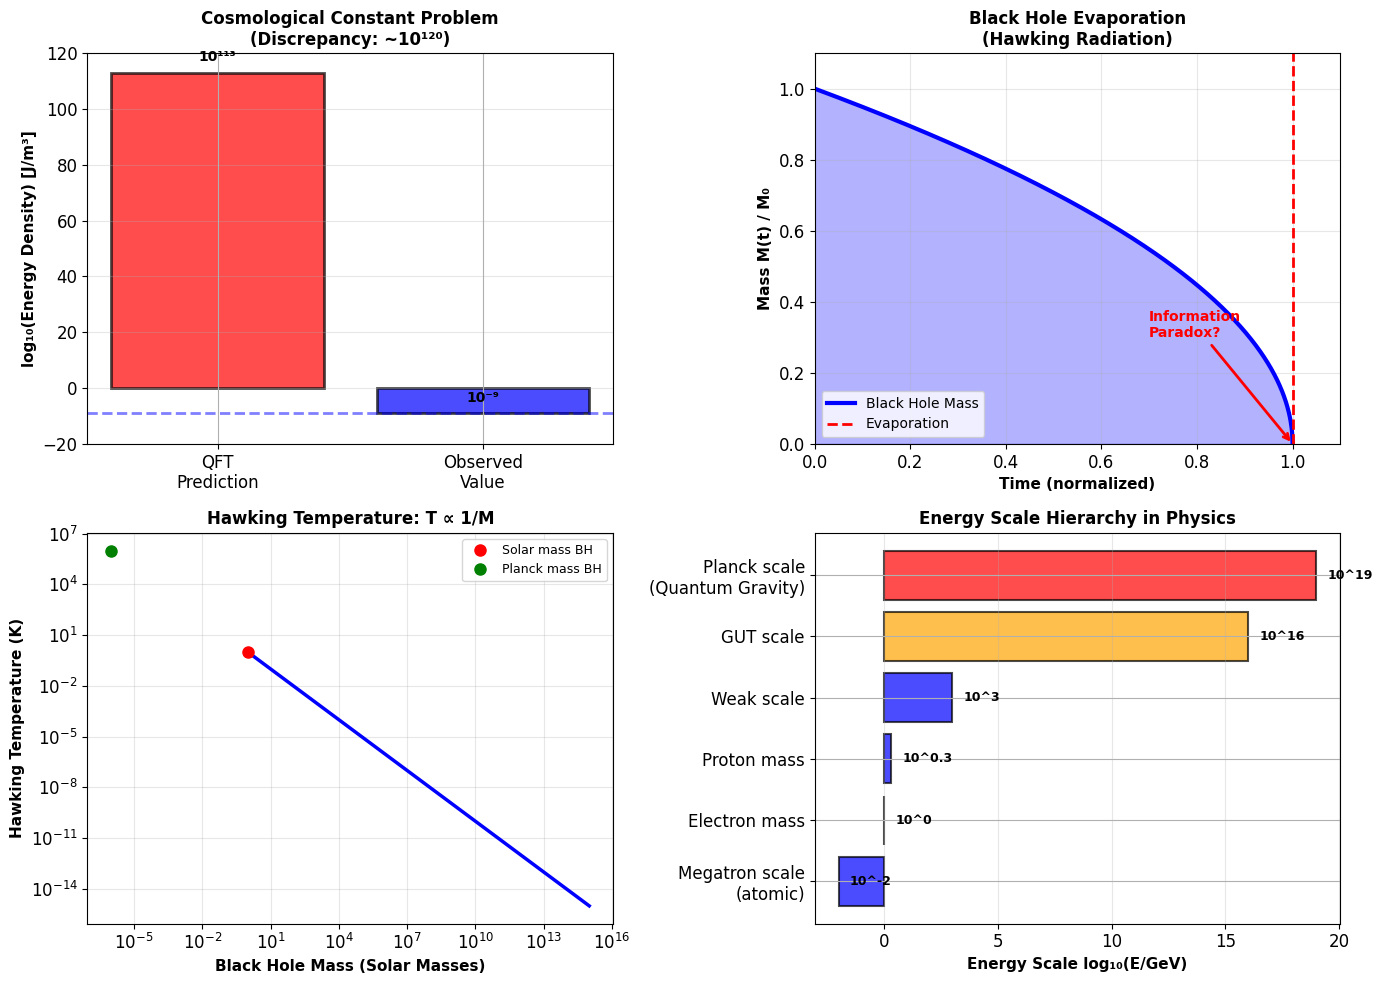


Visualization saved as 'quantum_gravity_problems.png'

KEY INSIGHTS:

1. COSMOLOGICAL CONSTANT: The prediction-observation discrepancy of~10¹²⁰
   suggests deep physics is missing in our understanding of the vacuum.

2. BLACK HOLE INFORMATION: When a black hole evaporates completely,
   all information seems lost. Quantum mechanics says information must
   be preserved. This is a profound tension.

3. HAWKING TEMPERATURE: Smaller black holes are hotter! A Planck-mass
   black hole has T ~ 10²¹ K and evaporates nearly instantly.

4. ENERGY HIERARCHY: There are 19 orders of magnitude between the weak
   scale and the Planck scale. Why such huge gaps? This is the
   'hierarchy problem' in particle physics.


In [8]:
# Visualize the deep problems in quantum gravity

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ============================================
# Plot 1: The Cosmological Constant Problem
# ============================================
ax = axes[0, 0]

theories = ['QFT\nPrediction', 'Observed\nValue']
rho_values = [1e113, 1e-9]  # In J/m³ (on log scale)
colors = ['red', 'blue']

# Use log scale for better visualization
log_rho = [np.log10(abs(rho)) if rho != 0 else 0 for rho in rho_values]

bars = ax.bar(theories, log_rho, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_ylabel('log₁₀(Energy Density) [J/m³]', fontsize=11, fontweight='bold')
ax.set_title('Cosmological Constant Problem\n(Discrepancy: ~10¹²⁰)', fontsize=12, fontweight='bold')
ax.set_ylim(-20, 120)
ax.axhline(y=log_rho[1], color='blue', linestyle='--', alpha=0.5)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (bar, log_val) in enumerate(zip(bars, log_rho)):
    if i == 0:
        label = '10¹¹³'
    else:
        label = '10⁻⁹'
    ax.text(bar.get_x() + bar.get_width()/2, log_val + 3, label, 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# ============================================
# Plot 2: Black Hole Evaporation and Information Paradox
# ============================================
ax = axes[0, 1]

# Time evolution of black hole mass
t = np.linspace(0, 1, 1000)  # Normalized time (0 to 1)
M_t = np.sqrt(1 - t)  # M(t) ∝ sqrt(1 - t/t_evap), so normalized: sqrt(1-t)

ax.plot(t, M_t, 'b-', linewidth=3, label='Black Hole Mass')
ax.fill_between(t, 0, M_t, alpha=0.3, color='blue')
ax.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Evaporation')
ax.set_xlabel('Time (normalized)', fontsize=11, fontweight='bold')
ax.set_ylabel('Mass M(t) / M₀', fontsize=11, fontweight='bold')
ax.set_title('Black Hole Evaporation\n(Hawking Radiation)', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)
ax.grid(True, alpha=0.3)

# Add annotation
ax.annotate('Information\nParadox?', xy=(1, 0), xytext=(0.7, 0.3),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, color='red', fontweight='bold')

# ============================================
# Plot 3: Hawking Temperature vs. Black Hole Mass
# ============================================
ax = axes[1, 0]

# T = ℏc³ / (8π k_B G M)
# As M increases, T decreases (inverse relationship)
M_BH = np.logspace(0, 15, 1000)  # Mass range: solar masses
T_H = 1 / M_BH  # Temperature proportional to 1/M

ax.loglog(M_BH, T_H, 'b-', linewidth=2.5)
ax.set_xlabel('Black Hole Mass (Solar Masses)', fontsize=11, fontweight='bold')
ax.set_ylabel('Hawking Temperature (K)', fontsize=11, fontweight='bold')
ax.set_title('Hawking Temperature: T ∝ 1/M', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, which='both')

# Mark special points
ax.plot(1, 1, 'ro', markersize=8, label='Solar mass BH')
ax.plot(1e-6, 1e6, 'go', markersize=8, label='Planck mass BH')
ax.legend(fontsize=9)

# ============================================
# Plot 4: Energy Scale Landscape
# ============================================
ax = axes[1, 1]

# Different energy scales in physics
scales = [
    ('Megatron scale\n(atomic)', -2),
    ('Electron mass', 0),
    ('Proton mass', 0.3),
    ('Weak scale', 3),
    ('GUT scale', 16),
    ('Planck scale\n(Quantum Gravity)', 19),
]

scale_names = [s[0] for s in scales]
scale_energies = [s[1] for s in scales]

colors_scales = ['blue' if i < 4 else 'orange' if i < 5 else 'red' for i in range(len(scales))]

bars = ax.barh(scale_names, scale_energies, color=colors_scales, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Energy Scale log₁₀(E/GeV)', fontsize=11, fontweight='bold')
ax.set_title('Energy Scale Hierarchy in Physics', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, scale_energies)):
    ax.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'10^{val}', 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('quantum_gravity_problems.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nVisualization saved as 'quantum_gravity_problems.png'")
print()
print("="*70)
print("KEY INSIGHTS:")
print("="*70)
print()
print("1. COSMOLOGICAL CONSTANT: The prediction-observation discrepancy of~10¹²⁰")
print("   suggests deep physics is missing in our understanding of the vacuum.")
print()
print("2. BLACK HOLE INFORMATION: When a black hole evaporates completely,")
print("   all information seems lost. Quantum mechanics says information must")
print("   be preserved. This is a profound tension.")
print()
print("3. HAWKING TEMPERATURE: Smaller black holes are hotter! A Planck-mass")
print("   black hole has T ~ 10²¹ K and evaporates nearly instantly.")
print()
print("4. ENERGY HIERARCHY: There are 19 orders of magnitude between the weak")
print("   scale and the Planck scale. Why such huge gaps? This is the")
print("   'hierarchy problem' in particle physics.")

## 9. Where Humanity Stands

### The Current Situation

After 50+ years, we have:

✓ **Excellent theories** for each domain:
- General Relativity (gravity, large scales)
- Quantum Field Theory (particles, small scales)

✗ **No unified theory** that works at both scales simultaneously

✗ **No experimental guidance:** Planck scale is 16 orders of magnitude beyond LHC

✗ **Deep conceptual issues** (time, information, singularities)

### Why Is Quantum Gravity So Hard?

1. **Dimensional analysis suggests failure:**
   - Newton's constant $G$ has dimensions [length³ / (mass × time²)]
   - This makes $G$ small and gravity weak
   - Quantum corrections grow at high energies, inevitably diverging

2. **No mass gaps:**
   - In QCD, color confinement creates a mass gap at low energies
   - In gravity, no such mechanism exists; all scales are coupled

3. **Background independence is hard:**
   - All our tools (perturbation theory, renormalization) assume fixed spacetime
   - Starting over without a background is conceptually difficult

### The Approaches and Their Status

| Approach | Strengths | Weaknesses |
|----------|-----------|----------|
| **String Theory** | Elegant, includes all forces, mathematically rich | Extra dimensions, untestable, landscape problem |
| **Loop QG** | Background-independent, 4D, rigorous | Hard to extract predictions, unclear low-E limit |
| **Asymptotic Safety** | Minimal assumptions, potentially renormalizable | Speculative, numerical evidence only |
| **CDT** | Computationally tractable, discrete spacetime | Unclear continuum limit, hard to extract physics |
| **Emergent Gravity** | Deep conceptual insights (holography) | Unclear how to make concrete predictions |

### The Philosophical Shift

Quantum gravity forces us to reconsider fundamental assumptions:

- **Is spacetime fundamental?** Or emergent from entanglement?
- **Is time fundamental?** Or an emergent concept?
- **Is locality fundamental?** Or approximate at large scales?
- **What is the deep structure of reality?**

These questions have no answer yet, but they're being taken seriously by leading physicists.

## 10. Open Research Questions

### Immediate Challenges

1. **Resolve the information paradox:** Is information preserved in black hole evaporation?
2. **Connect to low-energy physics:** How does classical GR emerge from quantum gravity?
3. **Explain the cosmological constant:** Why is dark energy so small?
4. **Find the ground state:** What is the vacuum state of quantum gravity?
5. **Solve the problem of time:** How is time defined without external time?

### Conceptual Revolutions

1. **Is quantum mechanics fundamental?** Or does it emerge?
2. **What replaces spacetime?** How do we think about physics without it?
3. **What is the deep structure?** Are there entities more fundamental than fields?

### Experimental Possibilities

Although direct Planck-scale experiments seem impossible, indirect signatures may appear:

- **Gravitational wave observations:** LIGO/Virgo may detect subtle quantum corrections
- **Cosmological observations:** Planck satellite data on CMB might reveal quantum gravity signatures
- **Tabletop experiments:** Gravitationally-induced entanglement (very difficult, but being pursued)
- **Astrophysics:** Exotic objects (neutron stars, black holes) might reveal quantum gravity effects

### The Next Generation

You—if you pursue theoretical physics—might be among those who finally unifies these theories. The tools are mathematical, conceptual, and creative. There's no single "correct" approach; the future may combine ideas from multiple frameworks in unexpected ways.

The quantum gravity revolution has just begun.

## References and Further Reading

### Quantum Gravity Textbooks

- **Smolin**, *Three Roads to Quantum Gravity* (accessible overview)
- **Wald**, *General Relativity* (GR foundations)
- **Peskin & Schroeder**, *An Introduction to Quantum Field Theory* (QFT foundations)
- **Rovelli**, *Quantum Gravity* (LQG perspective)
- **Zwiebach**, *A First Course in String Theory* (string theory introduction)
- **Ashtekar & Lewandowski**, *Background Independent Quantum Gravity* (technical, LQG)

### Classic Papers

- Hawking (1974), *Black Hole Explosions*, Nature
- Wheeler & DeWitt (1967), *Quantum Theory and Gravity*
- Ashtekar (1987), *New Variables for Classical and Quantum Gravity*

### Online Resources

- **ArXiv.org** — Preprints in quantum gravity and related fields
- **Lectures by Juan Maldacena** on AdS/CFT and holography
- **Perimeter Institute** — Free lectures on quantum gravity approaches
- **PBS Space Time** (YouTube) — Accessible quantum gravity explanations

### Unsolved Problems

The most important open questions in quantum gravity are discussed in:
- *Physics of Black Holes* (Les Houches lectures)
- *Approaches to Quantum Gravity* (edited collection)
- Conference proceedings from GR meetings and quantum gravity workshops